In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
movies_data_path = os.path.join(os.path.pardir, 'data/processed_data.csv') 
movies_data = pd.read_csv(movies_data_path)

In [3]:
movies_data['release_date'] = pd.to_datetime(movies_data['release_date'])
movies_data['day_of_year'] = movies_data['release_date'].dt.day_of_year
movies_data['day_of_year_sin'] = np.sin(2 * np.pi * movies_data['day_of_year'] / 365)
movies_data['day_of_year_cos'] = np.cos(2 * np.pi * movies_data['day_of_year'] / 365) 
movies_data['year'] = movies_data['release_date'].dt.year
movies_data['year'] = (movies_data['year'] - movies_data['year'].mean()) / movies_data['year'].std() 

In [4]:
path_ratings = os.path.join(os.path.pardir, 'data/ratings.csv')
ratings_df = pd.read_csv(path_ratings)

ratings = ratings_df['rating'].to_numpy()
movieId_of_rating = ratings_df['movieId'].to_numpy()
movie_ids = set(ratings_df['movieId'].unique().tolist())

In [5]:
movies_data = movies_data[movies_data['movieId'].isin(movie_ids)]
movies_indices = movies_data['movieId'].to_numpy()
movies_data.drop(columns=['Unnamed: 0', 'index', 'movieId', 'release_date', 'day_of_year', 'count'], inplace=True)

A = movies_data.to_numpy()

In [ ]:
movies_data.head()

## <font color='red'> <div align='center'> I will first experiment with G-optimal design agent </font></div>

In [6]:
from utils import sample_k_movies
from MAB_class import MABAgent, LinUCB_MABAgent


# Let start with just 10 movies

k = 10000
m = 50
lambda_ = 1
movies_id_k = movies_indices[:k]
mask = [i for i in range(movieId_of_rating.size) if movieId_of_rating[i] in movies_id_k]
movieId_of_rating_k = movieId_of_rating[mask]
ratings_k = ratings[mask]


A_10 = sample_k_movies(A, k, m)
delta = 0.02
epsilon = 0.5
n_rounds = 1000000
true_rewards = ratings_k
rewardsXmovie_indices = movieId_of_rating_k 
actionXmovie_indices = movies_id_k


Agent_Optimal = MABAgent(A_10, delta, epsilon, n_rounds, true_rewards, rewardsXmovie_indices, actionXmovie_indices)
Agent_LinUCB = LinUCB_MABAgent(A_10, delta, lambda_, n_rounds, true_rewards, rewardsXmovie_indices, actionXmovie_indices)

In [7]:
set(actionXmovie_indices.tolist()) - set(rewardsXmovie_indices.tolist())

# Y ou should re move movies for which we have no ratings

set()

In [8]:
cumulative_regret, regret, theta = Agent_Optimal.run()

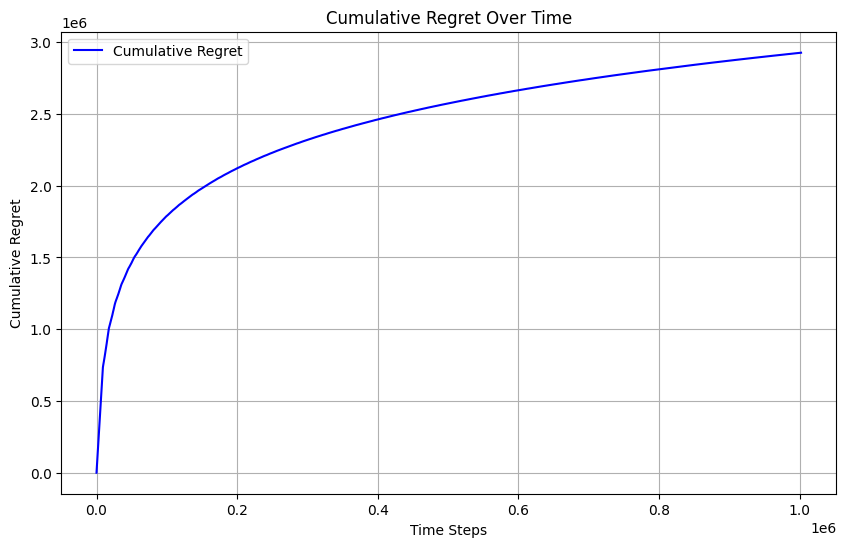

In [9]:
import matplotlib.pyplot as plt

time_steps = range(len(cumulative_regret))  # Assuming each entry corresponds to a time step

# Plotting  
plt.figure(figsize=(10, 6))
plt.plot(time_steps, cumulative_regret, linestyle='-', color='b', label='Cumulative Regret')

# Customizing the plot
plt.title('Cumulative Regret Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [11]:
Agent_LinUCB = LinUCB_MABAgent(A_10, delta, lambda_, n_rounds//100, true_rewards, rewardsXmovie_indices, actionXmovie_indices)

In [12]:
# cumulative_regret_linUCB, regret_linUCB, theta_linUCB = Agent_LinUCB.run()
cumulative_regret_linUCB, theta_linUCB = Agent_LinUCB.run()

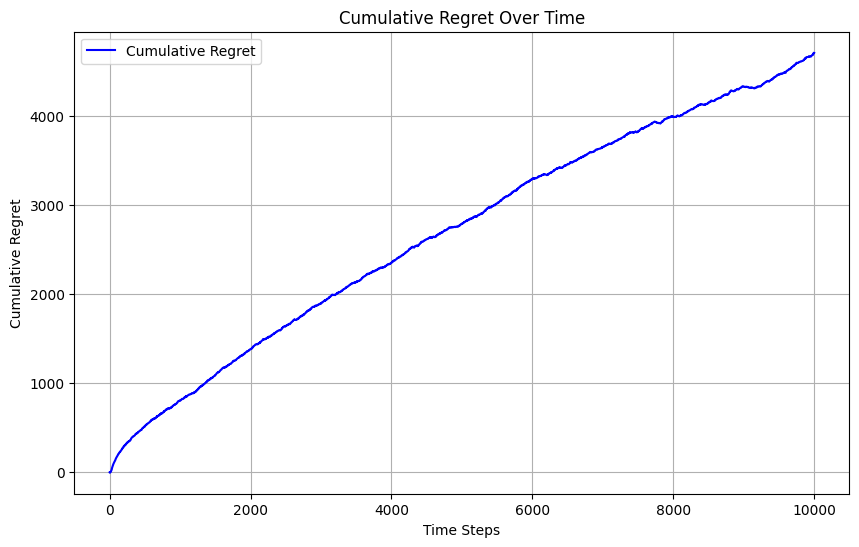

In [19]:
import matplotlib.pyplot as plt

time_steps_linUCB = range(len(cumulative_regret_linUCB))  # Assuming each entry corresponds to a time step

# Plotting  
plt.figure(figsize=(10, 6))
plt.plot(time_steps_linUCB, cumulative_regret_linUCB, linestyle='-', color='b', label='Cumulative Regret')

# Customizing the plot
plt.title('Cumulative Regret Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()